# Analysis the results

In [8]:
import argparse
import datetime
import json
import random
import time
from pathlib import Path
import os, sys
import numpy as np

import torch
from torch.utils.data import DataLoader, DistributedSampler, random_split, TensorDataset
from torch import nn
import matplotlib.pyplot as plt

In [9]:
def read_one_results(path):
    with open(path, "r") as outfile:
        data = json.load(outfile)
    return data

def write_one_results(path, json_data):
    with open(path, "w") as outfile:
        json.dump(json_data, outfile)
        
def display_data_hist(loss):
    plt.hist(loss, bins=50, label='ViT')
    plt.title('Loss Distribution')
    plt.xlabel('Loss')
    plt.ylabel('Probability Density')
    locs, _ = plt.yticks()
    plt.yticks(locs,np.round(locs/loss.shape[0],3))
    plt.legend()
    plt.show()
    
def np_read(file):
    with open(file, "rb") as outfile:
        data = np.load(outfile)
    return data
def np_write(data, file):
    with open(file, "wb") as outfile:
        np.save(outfile, data)

normalize = [0.05269893, 0.053517897]

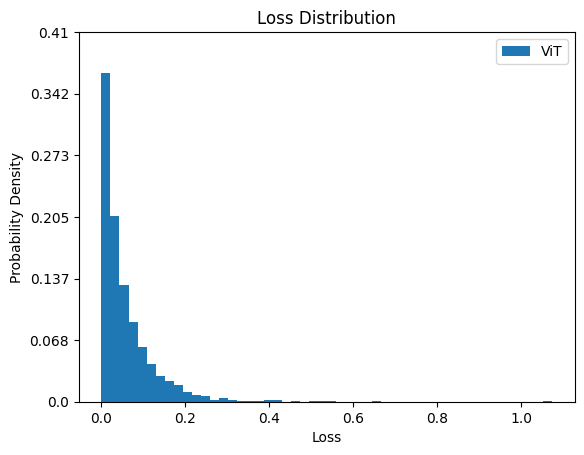

In [12]:
train_loss = np_read("./pro_data/DeepLab_VOC/train/image_true_losses.npy")
display_data_hist(train_loss)

In [11]:
train_loss.shape

(1464, 480)

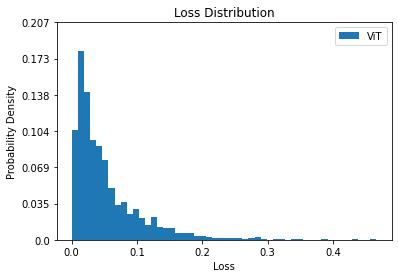

In [3]:
val_loss = np_read("/workspace/pytorch-segmentation/pro_data/PSPNet_VOC/val/image_true_losses.npy")
display_data_hist(val_loss)

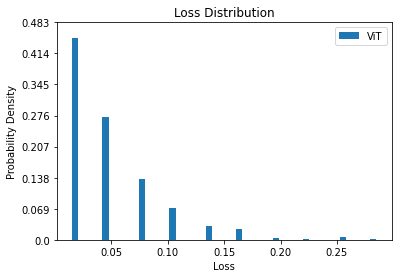

In [5]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/ViT-output-PSPNet-VOC-train-ordinal_losses_3800.json")['losses'])
display_data_hist(val_estimated_loss)

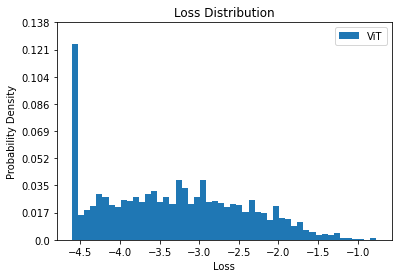

In [46]:
temp_loss = np.copy(val_loss)
temp_loss[temp_loss<0.01]=0.01
display_data_hist(np.log(temp_loss))

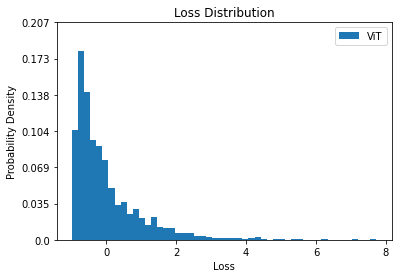

In [16]:
val_loss = (val_loss - normalize[0])/normalize[1]
display_data_hist(val_loss)

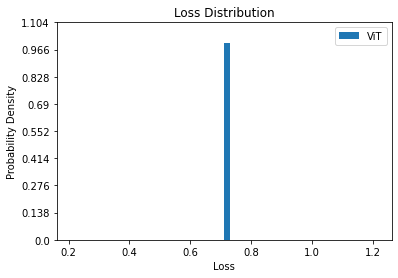

In [62]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/demo-simple-output-PSPNet-VOC-train_losses.json")['losses'])
# val_estimated_loss = val_estimated_loss * normalize[1] + normalize[0]
# val_estimated_loss = np.exp(val_estimated_loss)
display_data_hist(val_estimated_loss)

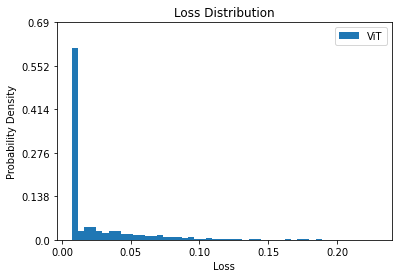

In [74]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/ViT-output-PSPNet-VOC-train-loss-design-entrop_losses.json")['losses'])
val_estimated_loss = val_estimated_loss / 10
display_data_hist(val_estimated_loss)

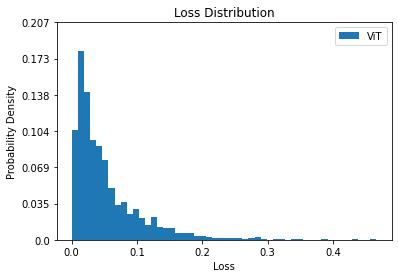

In [157]:
val_loss = np_read("/workspace/pytorch-segmentation/pro_data/PSPNet_VOC/val/image_true_losses.npy")
display_data_hist(val_loss)

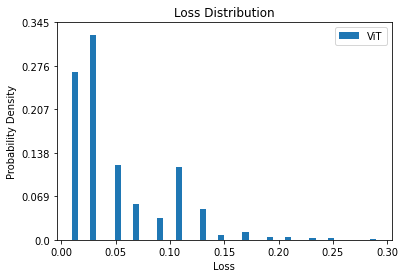

In [27]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/ViT-output-PSPNet-VOC-train-ordinal-8x8-grad_losses_1000.json")['losses'])
display_data_hist(val_estimated_loss)

In [178]:
val_estimated_loss.shape

(1449,)

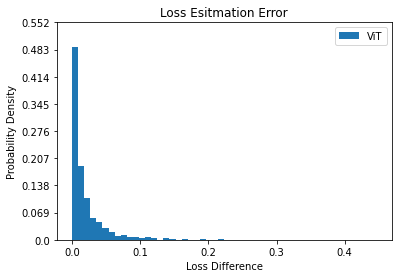

In [179]:
def display_data_hist(loss):
    plt.hist(loss, bins=50, label='ViT')
    plt.title('Loss Esitmation Error')
    plt.xlabel('Loss Difference')
    plt.ylabel('Probability Density')
    locs, _ = plt.yticks()
    plt.yticks(locs,np.round(locs/loss.shape[0],3))
    plt.legend()
    plt.show()
estimated_loss_diff = np.abs(val_loss - val_estimated_loss)
display_data_hist(estimated_loss_diff)

In [172]:
np.sort(estimated_loss_diff / 0.466109)[724]

0.02510813963639095

In [144]:
estimated_loss_diff.size, estimated_loss_diff.argmin(), estimated_loss_diff.argmax()

(1449, 974, 356)

In [159]:
np.argsort(estimated_loss_diff)[:10]

array([ 974,  496,  844,  876,   66, 1242, 1313,  698, 1142,  693])

In [173]:
val_loss[0]

0.025901623

In [174]:
estimated_loss_diff[0]

0.0040983762592077255

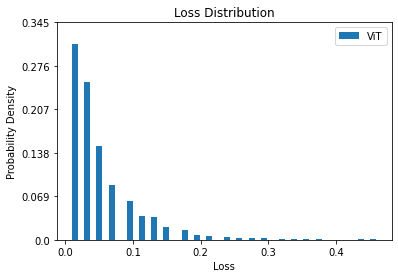

In [76]:
interval = np.linspace(0, 1, num=50)
estimate_val = np.copy(val_loss)
for i in range(0, interval.shape[0]-1):
    estimate_val[val_loss>interval[i]] = (interval[i] + interval[i+1])/2
display_data_hist(estimate_val)

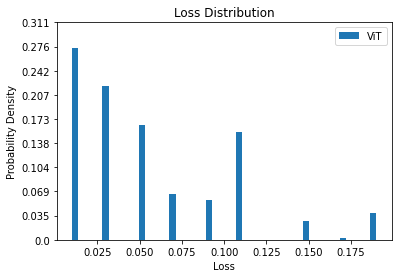

In [109]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/ViT-output-PSPNet-VOC-train-ordinal_losses.json")['losses'])
display_data_hist(val_estimated_loss)

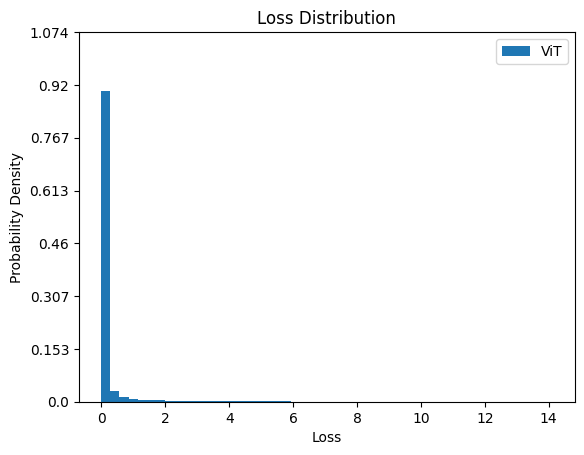

In [6]:
val_loss = np_read("./pro_data/DeepLab_VOC/val/region_16_16_true_losses.npy")
display_data_hist(val_loss)

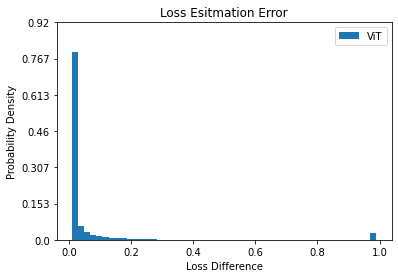

In [180]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/region_16_16/ViT-output-PSPNet-VOC-train-ordinal-new_losses_3600.json")['losses'])
display_data_hist(val_estimated_loss)

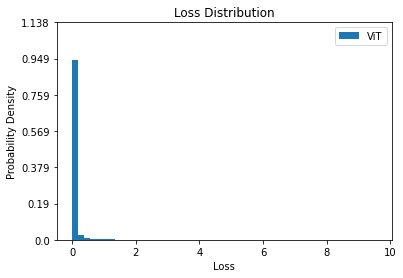

In [28]:
val_loss = np_read("/workspace/pytorch-segmentation/pro_data/PSPNet_VOC/train/region_8_8_true_losses.npy")
# val_loss = val_loss[val_loss>0.1]
display_data_hist(val_loss)

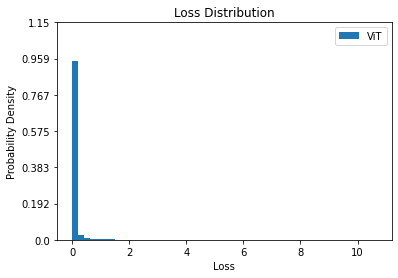

In [7]:
val_loss = np_read("/workspace/pytorch-segmentation/pro_data/PSPNet_VOC/val/region_8_8_true_losses.npy")
# val_loss = val_loss[val_loss>0.1]
display_data_hist(val_loss)

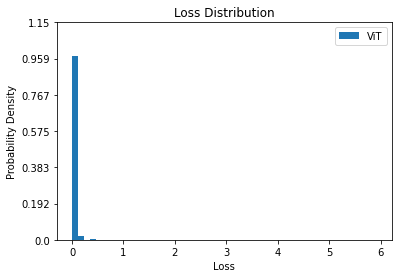

In [43]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/region_8_8/ViT-output-PSPNet-VOC-train-ordinal-8x8-grad_losses_10000.json")['losses'])
display_data_hist(val_estimated_loss)

In [44]:
(val_estimated_loss<0.01).sum() / val_estimated_loss.shape[0]

0.9726560463154666

37


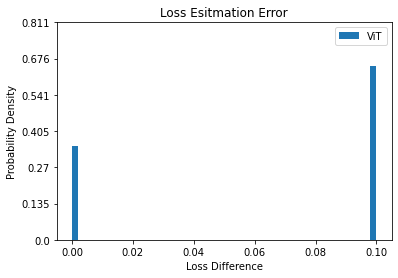

In [303]:
loc_larger = np.where(val_loss>8)
print(len(loc_larger[0]))
loc_larger_estimated_loss = val_estimated_loss[loc_larger]
display_data_hist(loc_larger_estimated_loss)

8


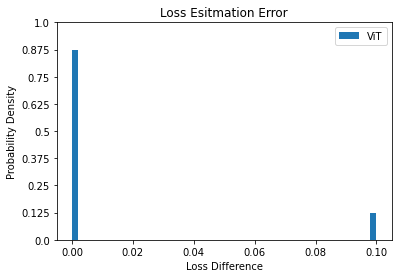

In [302]:
loc_larger = np.where(val_loss>9)
print(len(loc_larger[0]))
loc_larger_estimated_loss = val_estimated_loss[loc_larger]
display_data_hist(loc_larger_estimated_loss)

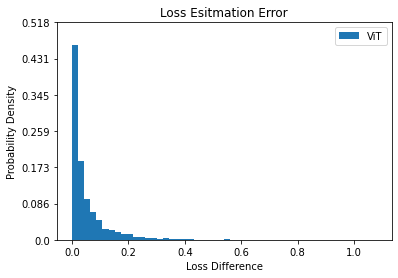

In [270]:
val_loss = np_read("/workspace/pytorch-segmentation/pro_data/PSPNet_VOC/val/image_split_2_2_true_losses.npy")
display_data_hist(val_loss)

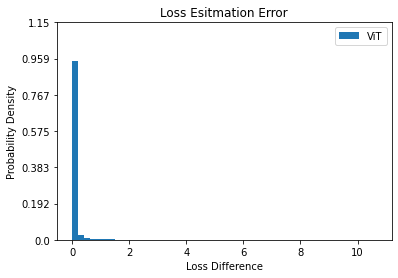

In [278]:
val_loss = np_read("/workspace/pytorch-segmentation/pro_data/PSPNet_VOC/val/region_8_8_image_split_true_losses.npy")
display_data_hist(val_loss)

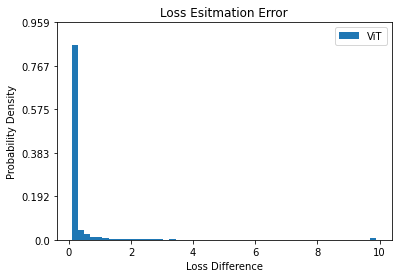

In [277]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/region_8_8_split/ViT-output-PSPNet-VOC-train-ordinal-image-split-2x2_losses_8000.json")['losses'])
display_data_hist(val_estimated_loss)

In [287]:
index = np.where(val_loss>9)

In [288]:
val_loss[index]

array([ 9.671311,  9.700688,  9.716144, 10.258706,  9.761281, 10.374043,
        9.936532, 10.661509], dtype=float32)

In [289]:
val_estimated_loss[index]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [290]:
index = np.where(val_estimated_loss>9)
print(val_loss[index])
print(val_estimated_loss[index])

[0.18021055 0.27282792 0.2648337  ... 0.6646246  0.8269217  1.5259575 ]
[9.89999962 9.89999962 9.89999962 ... 9.89999962 9.89999962 9.89999962]


In [294]:
np.array(index) // 900

array([[  11,   11,   11, ..., 5789, 5789, 5791]])